In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

## Loading the Dataset

In [2]:
df = pd.read_csv('ipl.csv')
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


In [3]:
df.shape

(74, 20)

## Basic Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

Now let's see how many columns have null values in total.

In [5]:
df.isna().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

1. Which team won the most matches?

Text(0.5, 1.0, 'Most match win by team ')

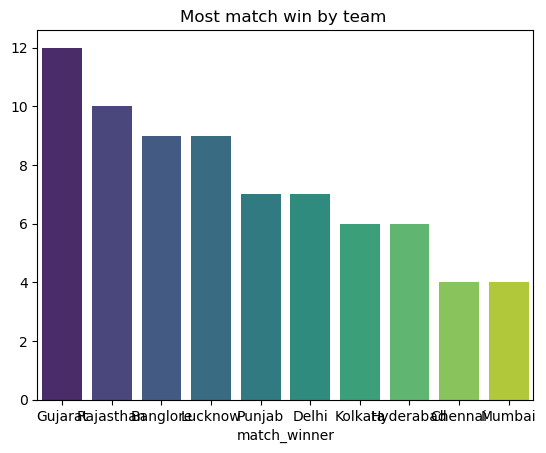

In [6]:
match_wins = df['match_winner'].value_counts()
sns.barplot(x = match_wins.index,y = match_wins.values,palette='viridis')
plt.title("Most match win by team ")

2. Toss Decision Trends

<Axes: xlabel='toss_decision', ylabel='count'>

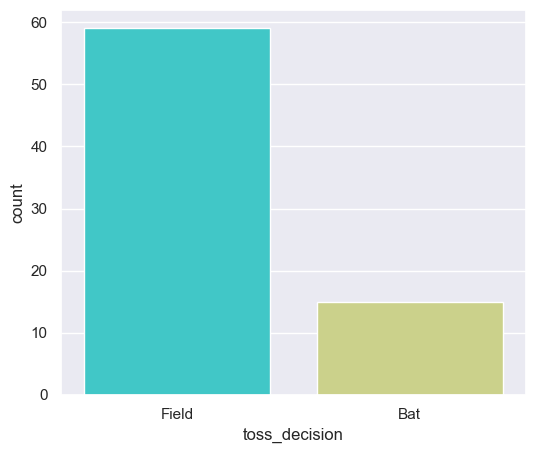

In [7]:
sns.set(rc={'figure.figsize':(6,5)})
sns.countplot(data = df, x = 'toss_decision', palette = 'rainbow')

3. Toss Winner vs Match Winner

In [8]:
count = df[df['toss_winner'] == df['match_winner']]['match_id'].count()
percentage = (count * 100) / df.shape[0]
percentage.round(2)

np.float64(48.65)

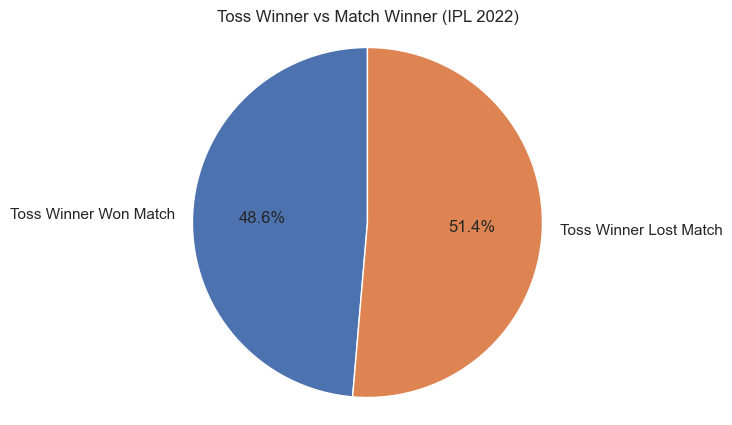

[np.int64(36), np.int64(38)]

In [9]:
df['toss_match_same'] = df['toss_winner'] == df['match_winner']
counts = df['toss_match_same'].value_counts()

labels = ['Toss Winner Won Match', 'Toss Winner Lost Match']
sizes = [counts.get(True, 0), counts.get(False, 0)]

plt.figure()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Toss Winner vs Match Winner (IPL 2022)')
plt.axis('equal')
plt.show()

sizes

In [10]:
del df['toss_match_same']

4. How do teams win? (Runs vs Wickets)

Text(0.5, 1.0, 'Won by')

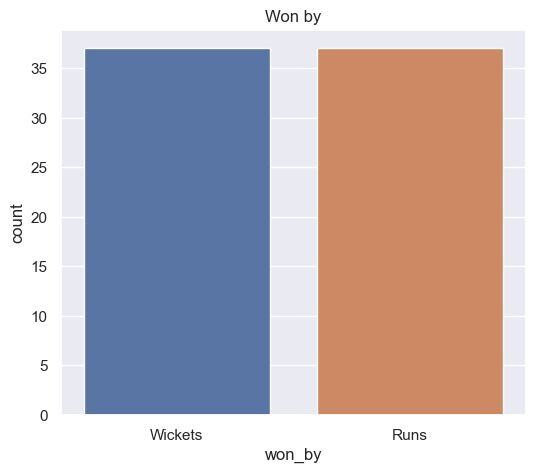

In [11]:
sns.countplot(x = df['won_by'], hue = df['won_by'])
plt.title("Won by")

## Key Player Performances

1. Most "Player of the Match" Awards

Text(0.5, 1.0, 'Top 10 players with man of the match')

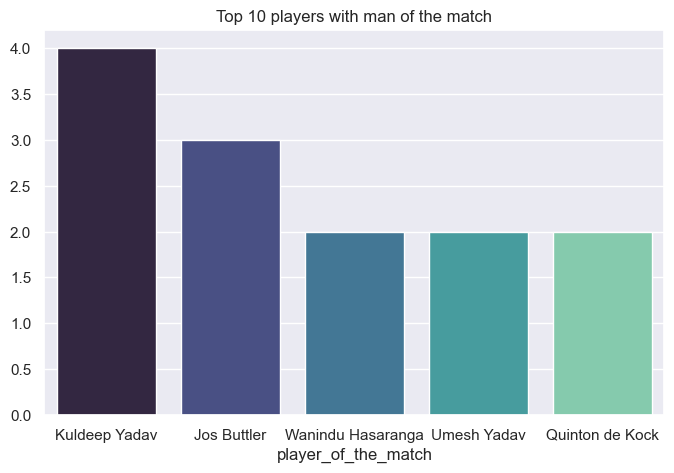

In [12]:
count = df['player_of_the_match'].value_counts().head()

sns.set(rc={'figure.figsize':(8,5)})
sns.barplot(y = count.values , x = count.index,palette='mako')
plt.title("Top 10 players with man of the match")

2. Top Scorers

In [13]:
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,margin,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 26,2022","Wankhede Stadium, Mumbai",Chennai,Kolkata,Group,Kolkata,Field,131,5,133,4,Kolkata,Wickets,6,Umesh Yadav,MS Dhoni,50,Dwayne Bravo,3--20
1,2,"March 27,2022","Brabourne Stadium, Mumbai",Delhi,Mumbai,Group,Delhi,Field,177,5,179,6,Delhi,Wickets,4,Kuldeep Yadav,Ishan Kishan,81,Kuldeep Yadav,3--18
2,3,"March 27,2022","Dr DY Patil Sports Academy, Mumbai",Banglore,Punjab,Group,Punjab,Field,205,2,208,5,Punjab,Wickets,5,Odean Smith,Faf du Plessis,88,Mohammed Siraj,2--59
3,4,"March 28,2022","Wankhede Stadium, Mumbai",Gujarat,Lucknow,Group,Gujarat,Field,158,6,161,5,Gujarat,Wickets,5,Mohammed Shami,Deepak Hooda,55,Mohammed Shami,3--25
4,5,"March 29,2022","Maharashtra Cricket Association Stadium,Pune",Hyderabad,Rajasthan,Group,Hyderabad,Field,210,6,149,7,Rajasthan,Runs,61,Sanju Samson,Aiden Markram,57,Yuzvendra Chahal,3--22


Text(0.5, 1.0, 'Top 10 Most Frequent Top Scorers – IPL 2022')

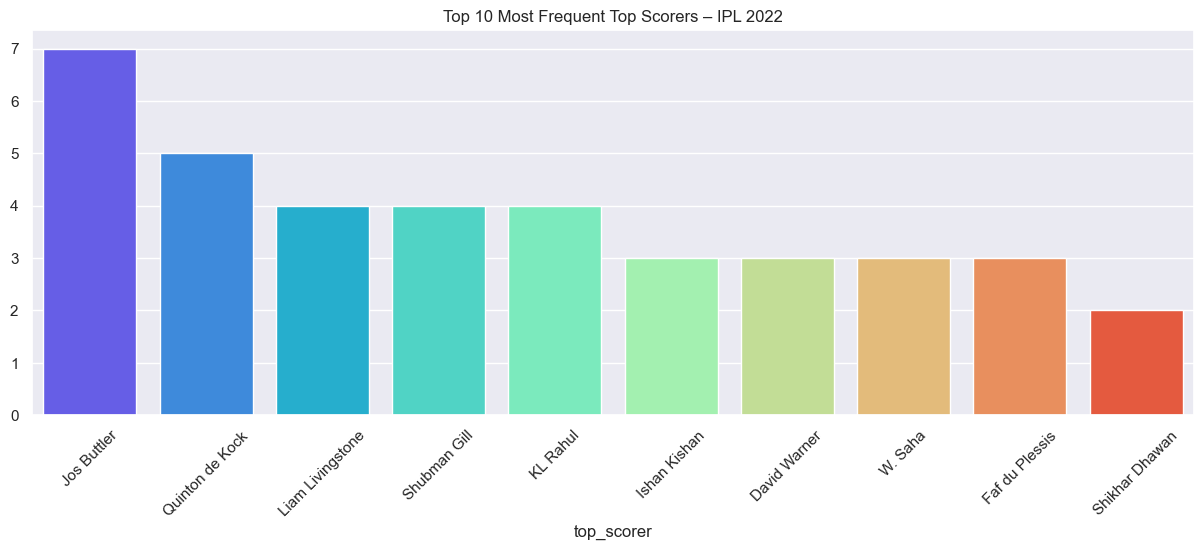

In [20]:
count = df['top_scorer'].value_counts().head(10)

sns.set(rc={'figure.figsize': (15, 5)})
sns.barplot(x=count.index, y=count.values, palette = 'rainbow')

plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Top Scorers – IPL 2022")

3. 10 Best Bowling Figures

<Axes: xlabel='best_bowling'>

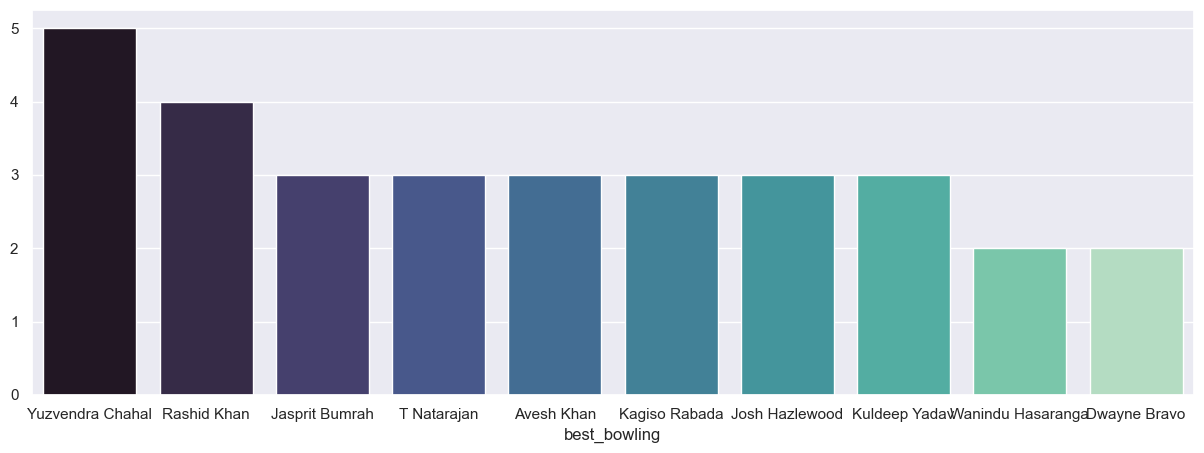

In [24]:
count = df['best_bowling'].value_counts().head(10)

sns.barplot(x = count.index, y = count.values, palette = 'mako')

## Venue Analysis

Most Matches Played by Venue

<Axes: ylabel='venue'>

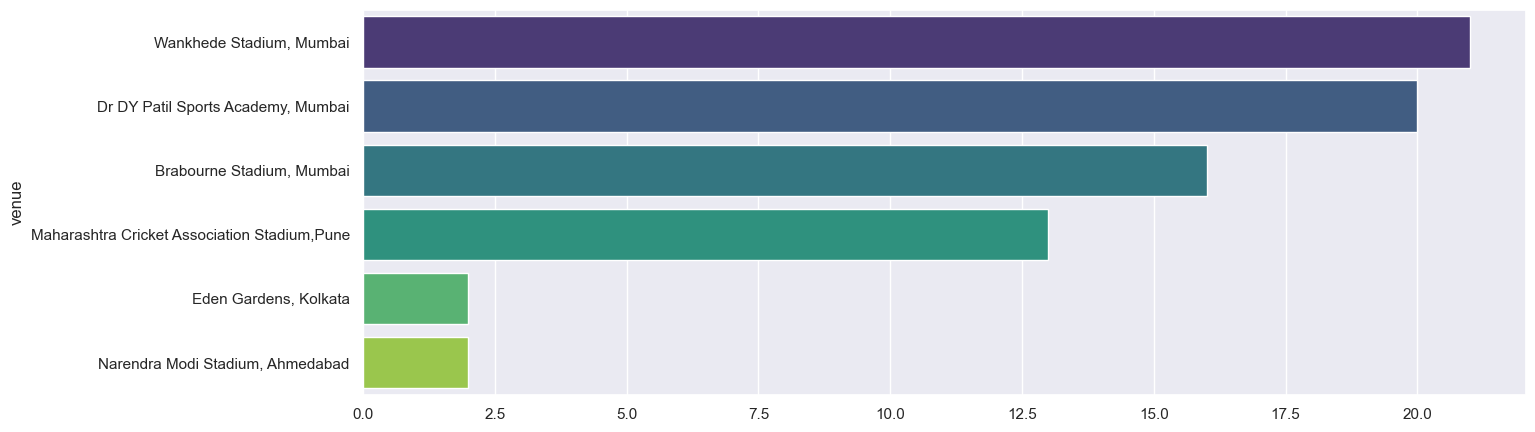

In [27]:
count = df['venue'].value_counts()

sns.barplot(y = count.index, x = count.values, palette = 'viridis')

## Custom Questions & Insights

Q1: Who won the highest margin by runs?

In [30]:
df[df['won_by'] == 'Runs'].sort_values(by = 'margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


Q2: Which player had the highest individual score?

In [44]:
df[df['highscore'] == df['highscore'].max()][['top_scorer','highscore']]

,top_scorer,highscore
65,Quinton de Kock,140


Q3: Which bowler had the best bowling figures?

In [51]:
df[df['highest_wickets'] == df['highest_wickets'].max()][['best_bowling','best_bowling_figure']]

,best_bowling,best_bowling_figure
29,Yuzvendra Chahal,5--40
39,Umran Malik,5--25
53,Wanindu Hasaranga,5--18
55,Jasprit Bumrah,5--10
